### Import Statements

In [34]:
import pynance, os
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Constants

In [35]:
BASE_PATH = "../data/yfinance_data/"
APPL_PATH = os.path.join(BASE_PATH, "AAPL_historical_data.csv")
AMZN_PATH = os.path.join(BASE_PATH, "AMZN_historical_data.csv")
GOOG_PATH = os.path.join(BASE_PATH, "GOOG_historical_data.csv")
META_PATH = os.path.join(BASE_PATH, "META_historical_data.csv")
MSFT_PATH = os.path.join(BASE_PATH, "MSFT_historical_data.csv")
NVDA_PATH = os.path.join(BASE_PATH, "NVDA_historical_data.csv")
TSLA_PATH = os.path.join(BASE_PATH, "TSLA_historical_data.csv")

### Load Data

For the sake of simplicity and to avoid downloading financial data again when ever this experiment file is run, I will be using the predownloaded yfinance data provided by Nova Finanacial Solutions.

I will load the data for individual tickers into individual variables and also combine them into one big dataframe incase it is needed in future cells

In [36]:
# read the historical datas into separate variables
appl_df = pd.read_csv(APPL_PATH)
amzm_df = pd.read_csv(AMZN_PATH)
goog_df = pd.read_csv(GOOG_PATH)
meta_df = pd.read_csv(META_PATH)
msft_df = pd.read_csv(MSFT_PATH)
nvda_df = pd.read_csv(NVDA_PATH)
tsla_df = pd.read_csv(TSLA_PATH)

# create lists: one that holds the symbol of the stock and another that holds the dataframe for the stock
tickers = ["APPL", "AMZM", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
dataframes = [appl_df, amzm_df, goog_df, meta_df, msft_df, nvda_df, tsla_df]

# loop through the lists and create a single datframe from the dataframes
combined_df = pd.DataFrame()
for ticker, dataframe in zip(tickers, dataframes):
    dataframe['Symbol'] = ticker
    combined_df = pd.concat([combined_df, dataframe])

Before continueing further let us print out the columns and verify that there are features like **Open**, **High**, **Low**, **Close**, and **Volume**

In [37]:
combined_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Symbol'],
      dtype='object')

### Stock Data Analysis

Let us plot the **Open**, **Close**, **High**, and **Low** for all the tickers

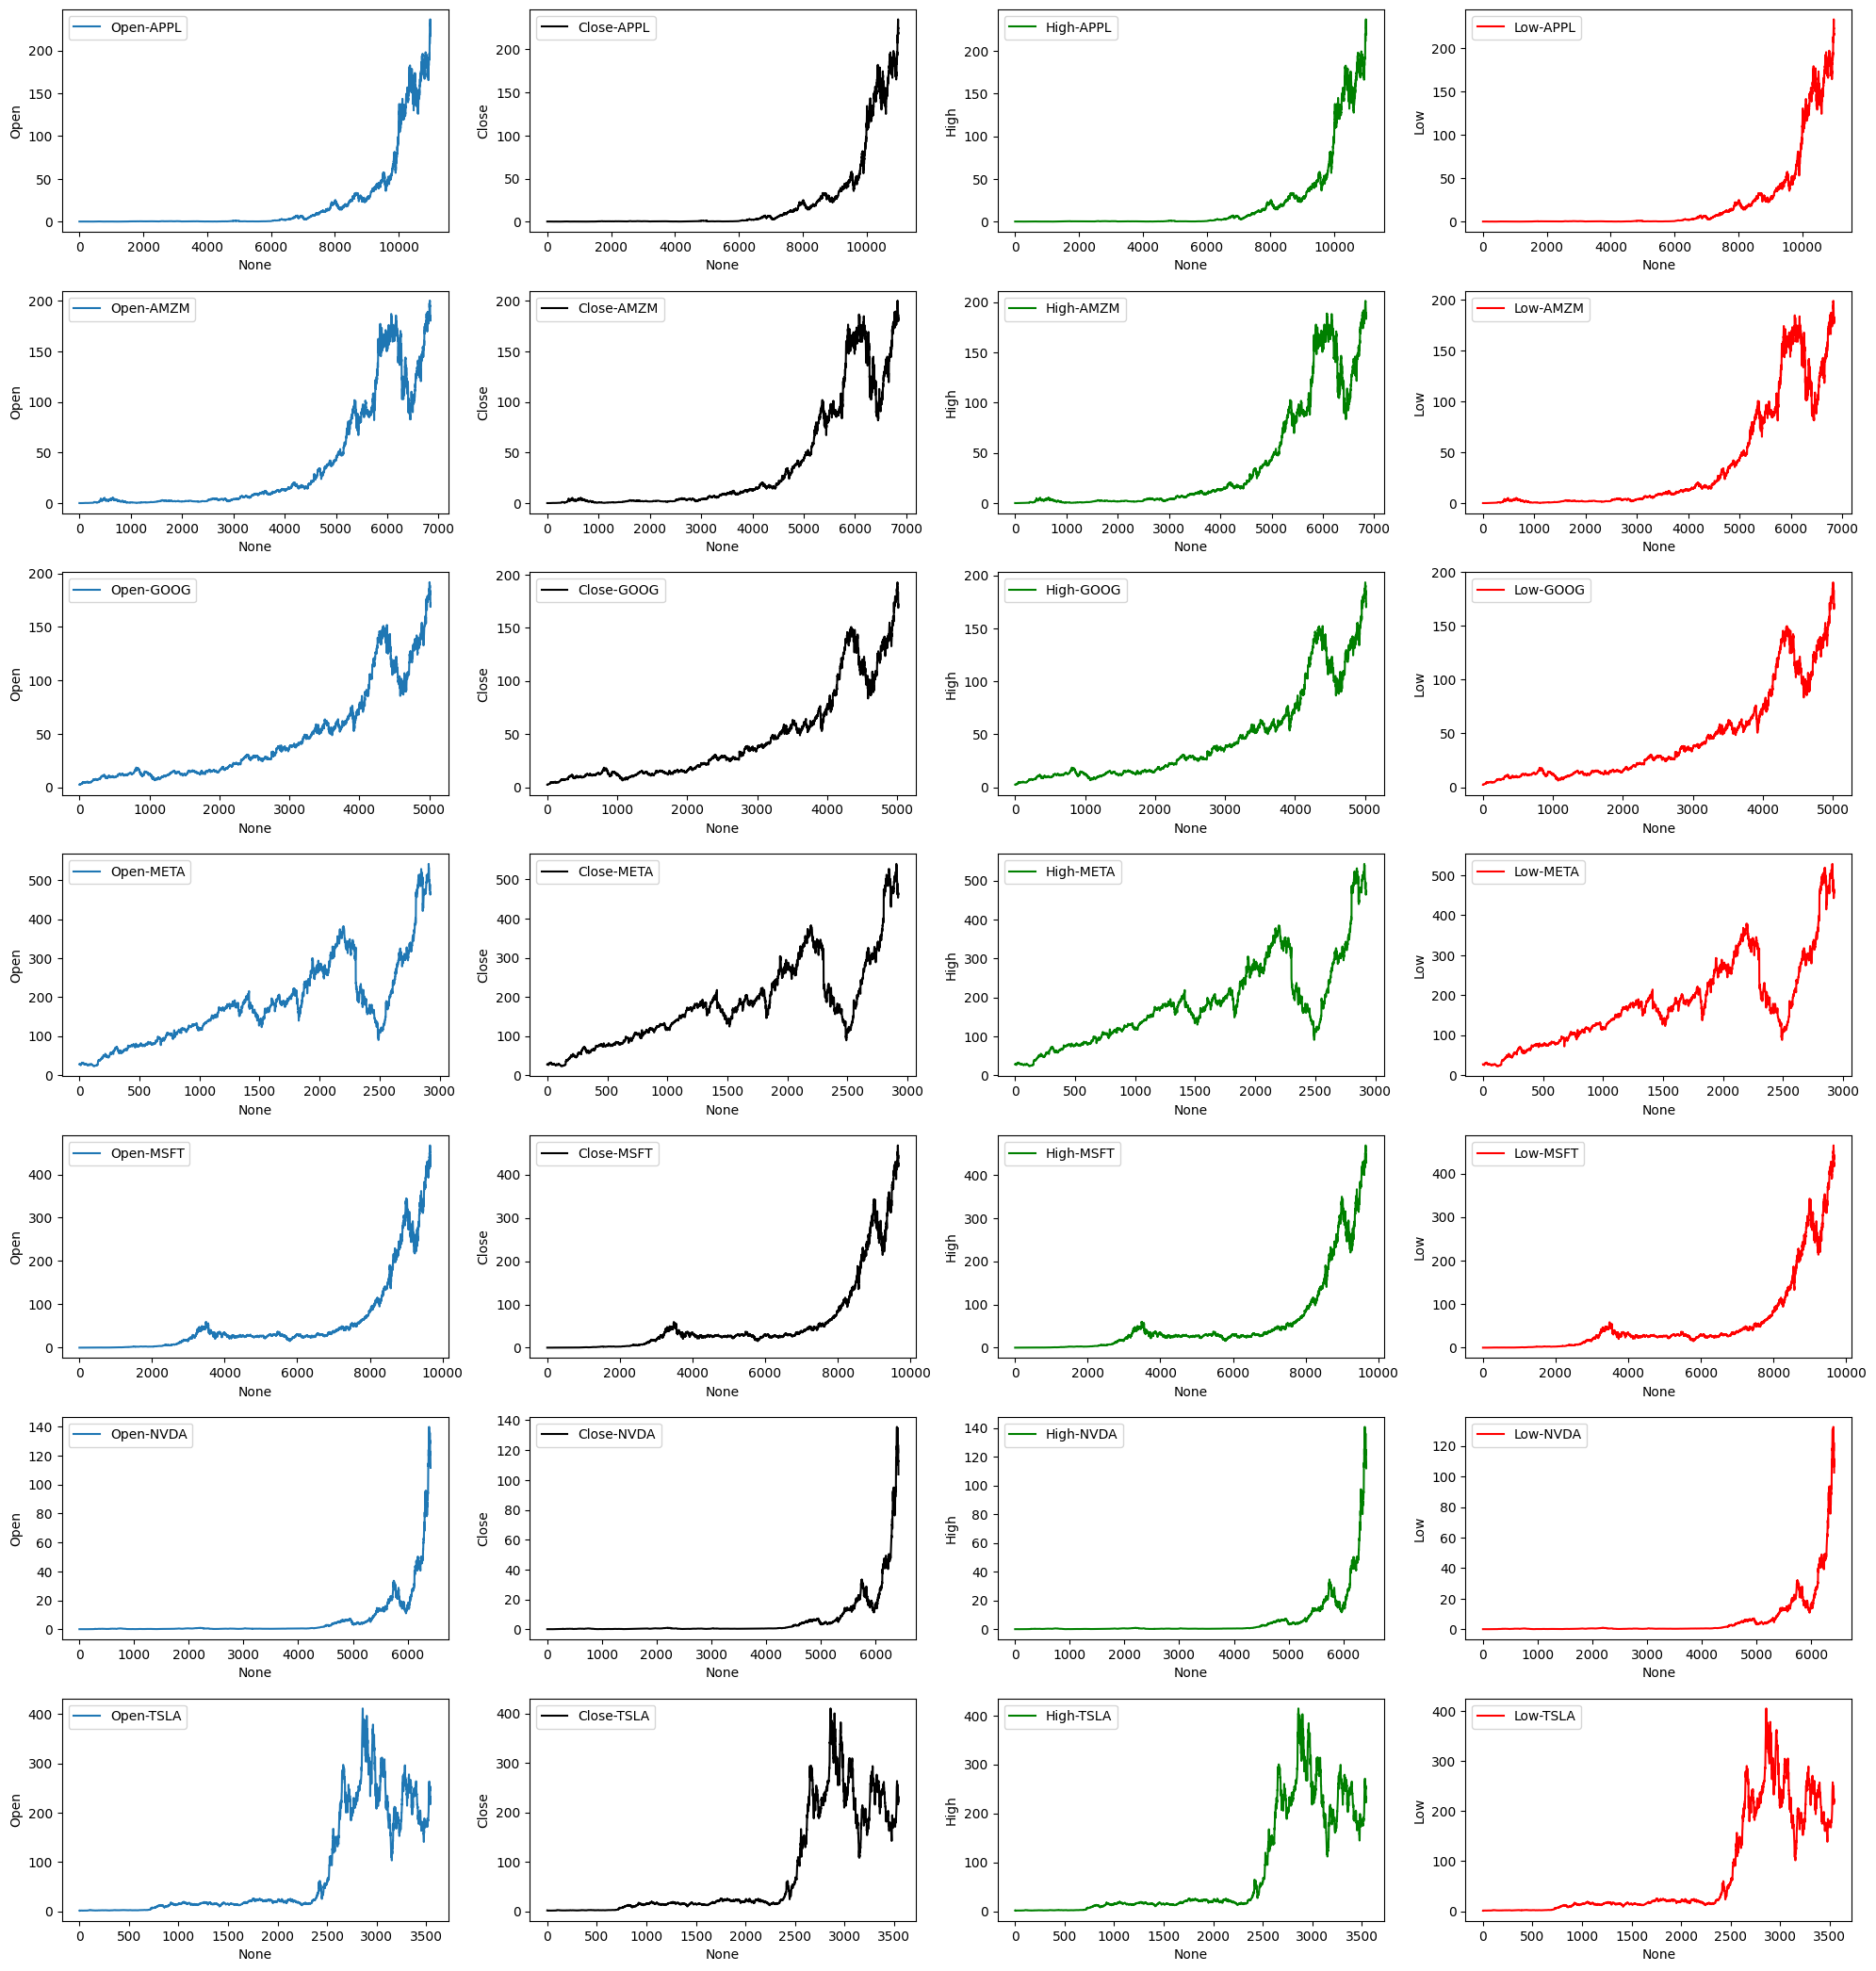

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=len(tickers), figsize=(20, 3 * len(tickers)), squeeze=True)

for idx in range(len(tickers)):
    ticker = tickers[idx]
    df = dataframes[idx]
    sns.lineplot(x=df.index, y=df["Open"], ax=ax[idx][0] , label=f"Open-{ticker}")
    sns.lineplot(x=df.index, y=df["Close"], ax=ax[idx][1] , label=f"Close-{ticker}" , color="black")
    sns.lineplot(x=df.index, y=df["High"], ax=ax[idx][2] , label=f"High-{ticker}", color="green")
    sns.lineplot(x=df.index, y=df["Low"], ax=ax[idx][3] , label=f"Low-{ticker}", color="red")
plt.tight_layout(pad=1)
plt.show()

For all the stocks/tickers we have let us calculate the following metrics:
* MA(Moving Averages)
* RSI(Relative Strength Index)
* MACD(Moving Average Convergence Divergence)
* BBAND(Bollinger Bands)

1) Calculating the moving averages

In [56]:
# calculating the moving averages
aapl_sma = ta.MA(appl_df['Close'], timeperiod=40)
amzm_sma = ta.MA(amzm_df['Close'], timeperiod=40)
goog_sma = ta.MA(goog_df['Close'], timeperiod=40)
meta_sma = ta.MA(meta_df['Close'], timeperiod=40)
msft_sma = ta.MA(msft_df['Close'], timeperiod=40)
nvda_sma = ta.MA(nvda_df['Close'], timeperiod=40)
tsla_sma = ta.MA(tsla_df['Close'], timeperiod=40)

# add them to a list
moving_averages = [aapl_sma, amzm_sma, goog_sma, meta_sma, msft_sma, nvda_sma, tsla_sma]

2. Calculating the Relative Strength Index

In [57]:
# calculating the relative strength index
aapl_rsi = ta.RSI(appl_df['Close'])
amzm_rsi = ta.RSI(amzm_df['Close'])
goog_rsi = ta.RSI(goog_df['Close'])
meta_rsi = ta.RSI(meta_df['Close'])
msft_rsi = ta.RSI(msft_df['Close'])
nvda_rsi = ta.RSI(nvda_df['Close'])
tsla_rsi = ta.RSI(tsla_df['Close'])

# add them to a list
rsi_values = [aapl_rsi, amzm_rsi, goog_rsi, meta_rsi, msft_rsi, nvda_rsi, tsla_rsi]

3. Calculating the Moving Average Convergence/Divergence

The MACD function in TA-Lib returns three results:
1) MACD: The difference between the 12-day and 26-day exponential moving averages (EMA) of the closing prices.
2) MACDh: The MACD histogram, which is the difference between the MACD line and the signal line.
3) MACDs: The signal line, which is a 9-day EMA of the MACD line.

Therefore we need to unpack the results into three variables for each ticker(data) we have

In [58]:
# calculating the moving averages
aapl_macd, aapl_hist, aapl_single  = ta.MACD(appl_df['Close'])
amzm_macd, amzm_hist, amzm_single = ta.MACD(amzm_df['Close'])
goog_macd, goog_hist, goog_single = ta.MACD(goog_df['Close'])
meta_macd, meta_hist, meta_single = ta.MACD(meta_df['Close'])
msft_macd, msft_hist, msft_single = ta.MACD(msft_df['Close'])
nvda_macd, nvda_hist, nvda_single = ta.MACD(nvda_df['Close'])
tsla_macd, tsla_hist, tsla_single = ta.MACD(tsla_df['Close'])

# add them to a list
macd_values = [aapl_macd, amzm_macd, goog_macd, meta_macd, msft_macd, nvda_macd, tsla_macd]
hist_values = [aapl_hist, amzm_hist, goog_hist, meta_hist, msft_hist, nvda_hist, tsla_hist]
single_values = [aapl_single, amzm_single, goog_single, meta_single, msft_single, nvda_single, tsla_single]

4. Calculating the Bollinger Bands

The BBANDS function in TA-Lib returns three results:
1) BBL: The lower Bollinger Band (typically the 20-period simple moving average minus 2 standard deviations).
2) BBM: The middle Bollinger Band (typically a 20-period simple moving average).
3) BBU: The upper Bollinger Band (typically the 20-period simple moving average plus 2 standard deviations).

Therefore we need to unpack the results into three variables for each ticker(data) we have

In [59]:
# calculating the bollinger bands
aapl_upper, aapl_middle, aapl_lower = ta.BBANDS(appl_df['Close'])
amzm_upper, amzm_middle, amzm_lower = ta.BBANDS(amzm_df['Close'])
goog_upper, goog_middle, goog_lower = ta.BBANDS(goog_df['Close'])
meta_upper, meta_middle, meta_lower = ta.BBANDS(meta_df['Close'])
msft_upper, msft_middle, msft_lower = ta.BBANDS(msft_df['Close'])
nvda_upper, nvda_middle, nvda_lower = ta.BBANDS(nvda_df['Close'])
tsla_upper, tsla_middle, tsla_lower = ta.BBANDS(tsla_df['Close'])

# add them to a list
upper_bands = [aapl_upper, amzm_upper, goog_upper, meta_upper, msft_upper, nvda_upper, tsla_upper]
middle_bands = [aapl_middle, amzm_middle, goog_middle, meta_middle, msft_middle, nvda_middle, tsla_middle]
lower_bands = [aapl_lower, amzm_lower, goog_lower, meta_lower, msft_lower, nvda_lower, tsla_lower]

Now let us visualize the SMA along side the real value

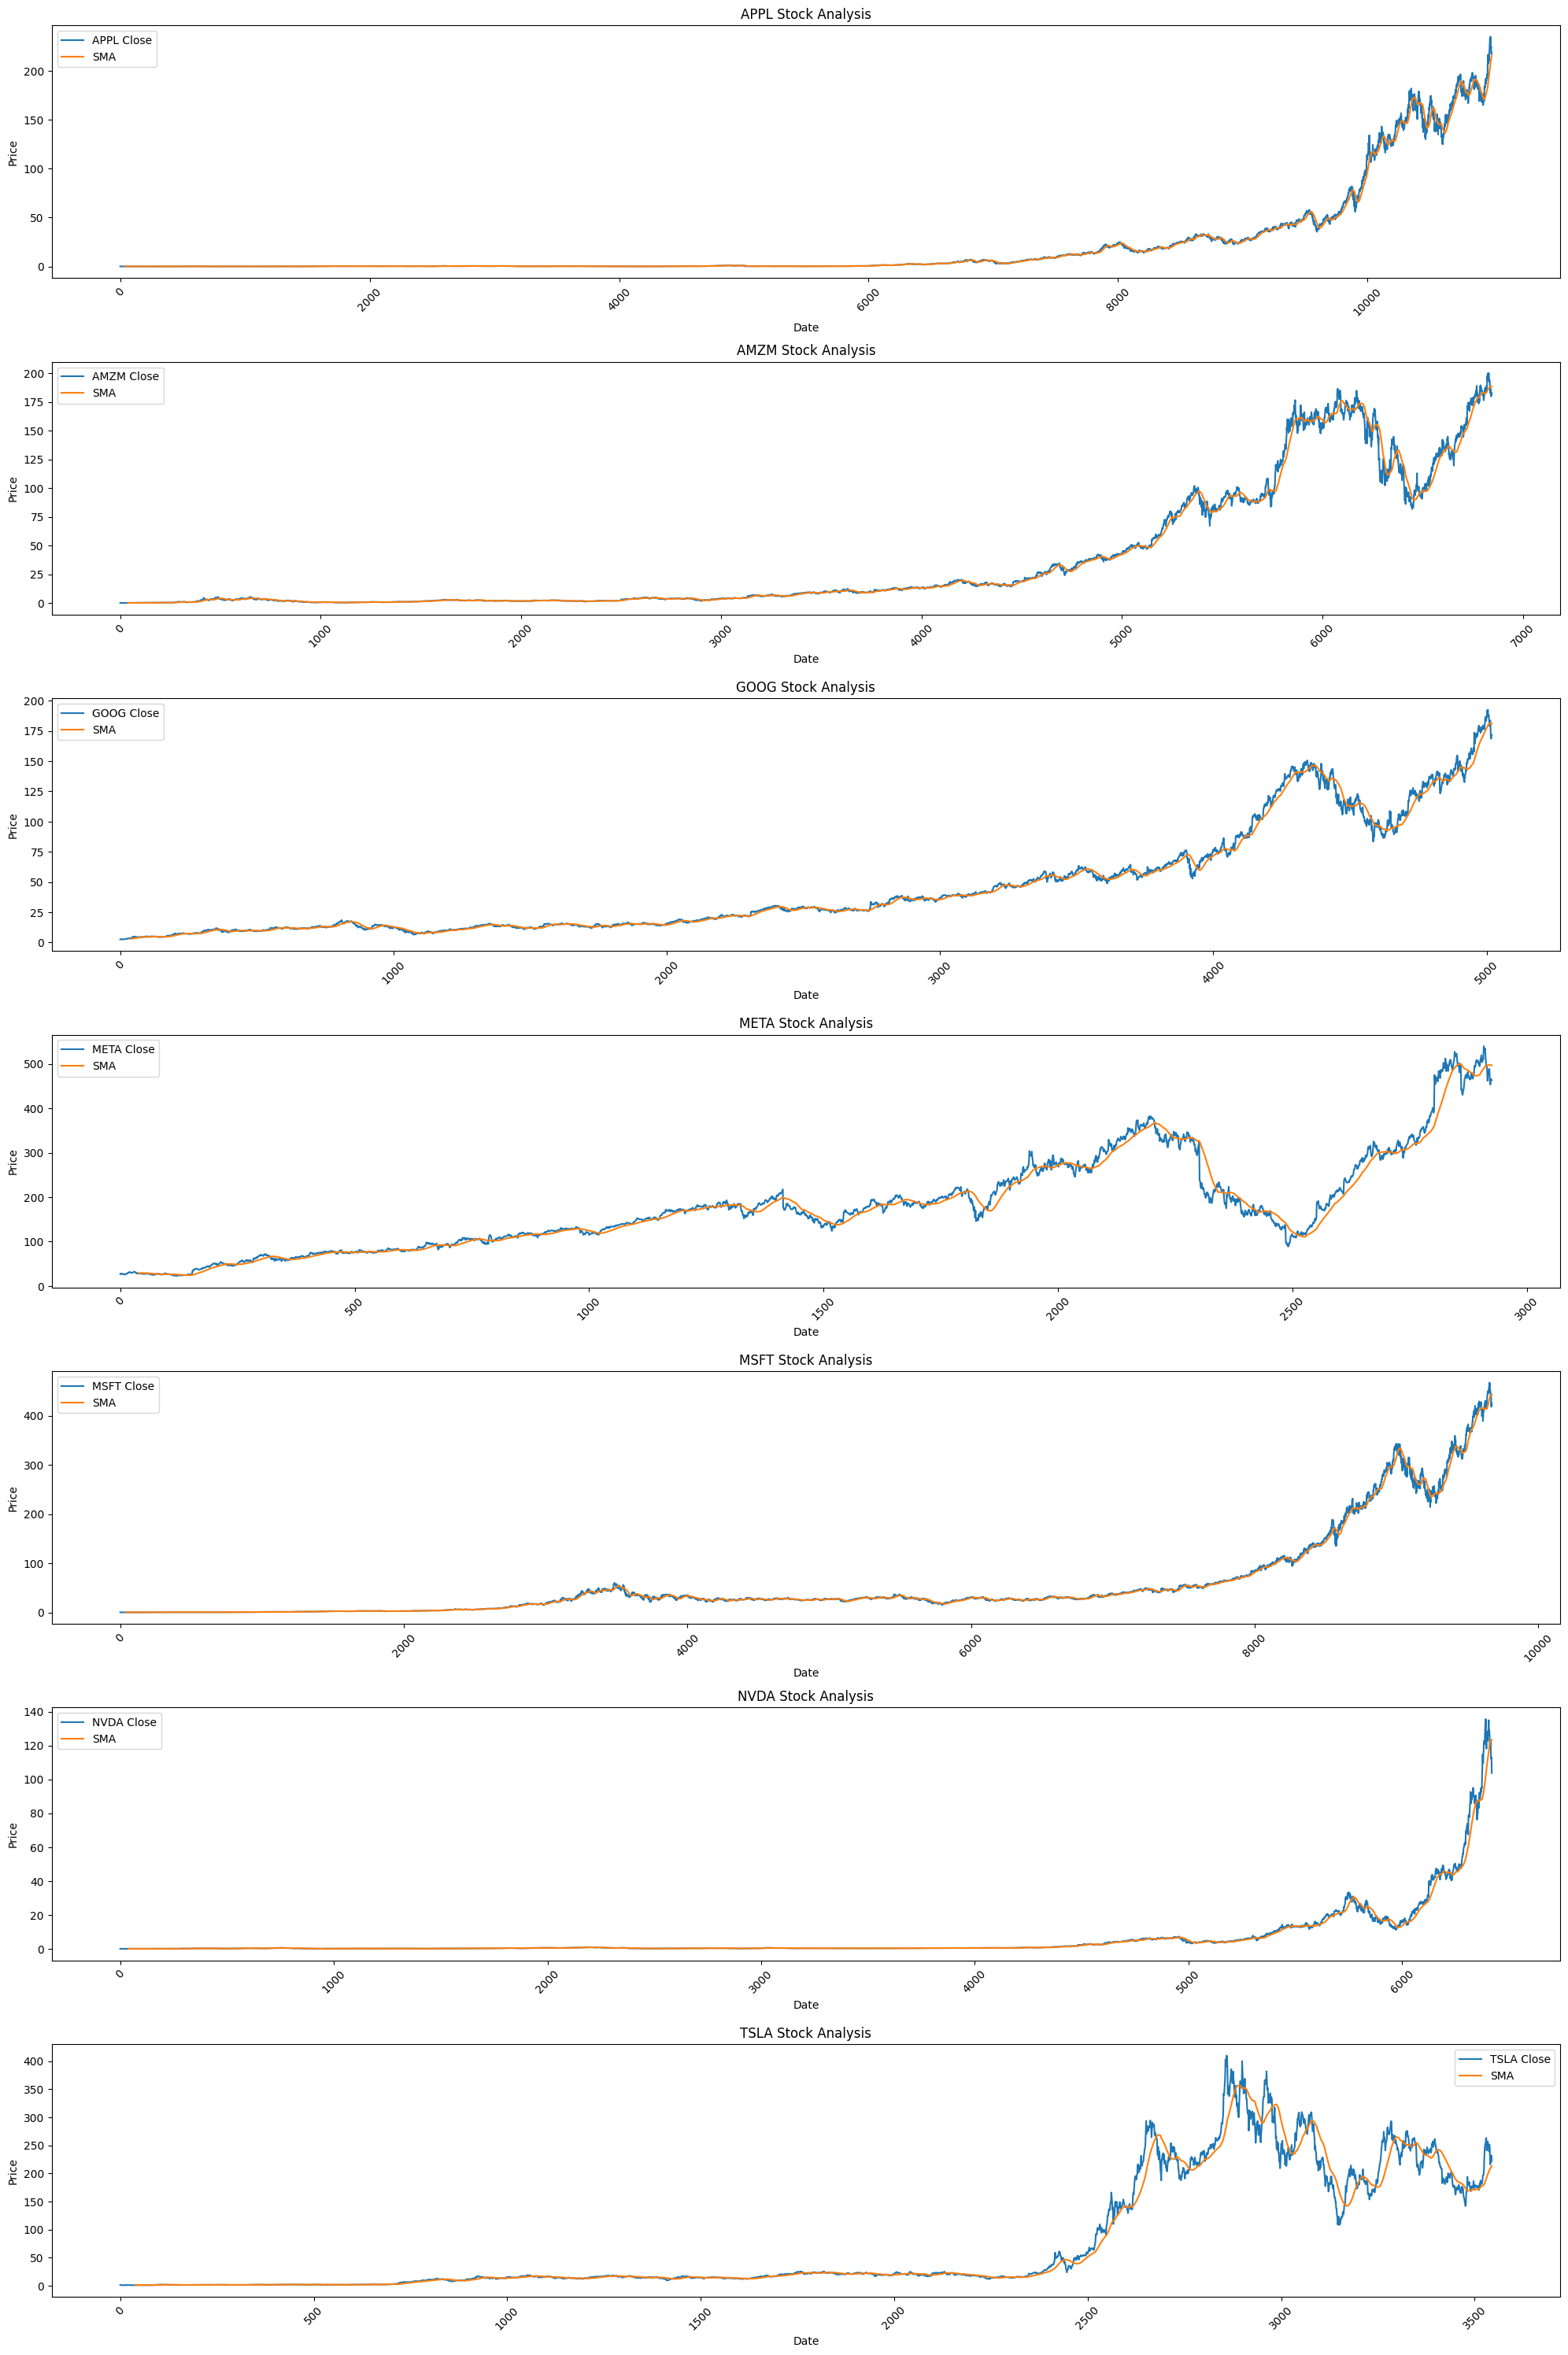

In [71]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    sma = moving_averages[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the moving average
    sns.lineplot(x=sma.index, y=sma, ax=ax[idx], label='SMA')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

From the above graphs we can see that the moving average acts a support for the prices of the stocks. What I mean by this is that most of the time the real prices of the stocks will stay above/below the moving average and it comes back down/up multiple times right upto the moving average before it crosses to the other side. It some what removes the unpredictability of the price movements 

Now let us visualize the Bollinger bands along side the real value

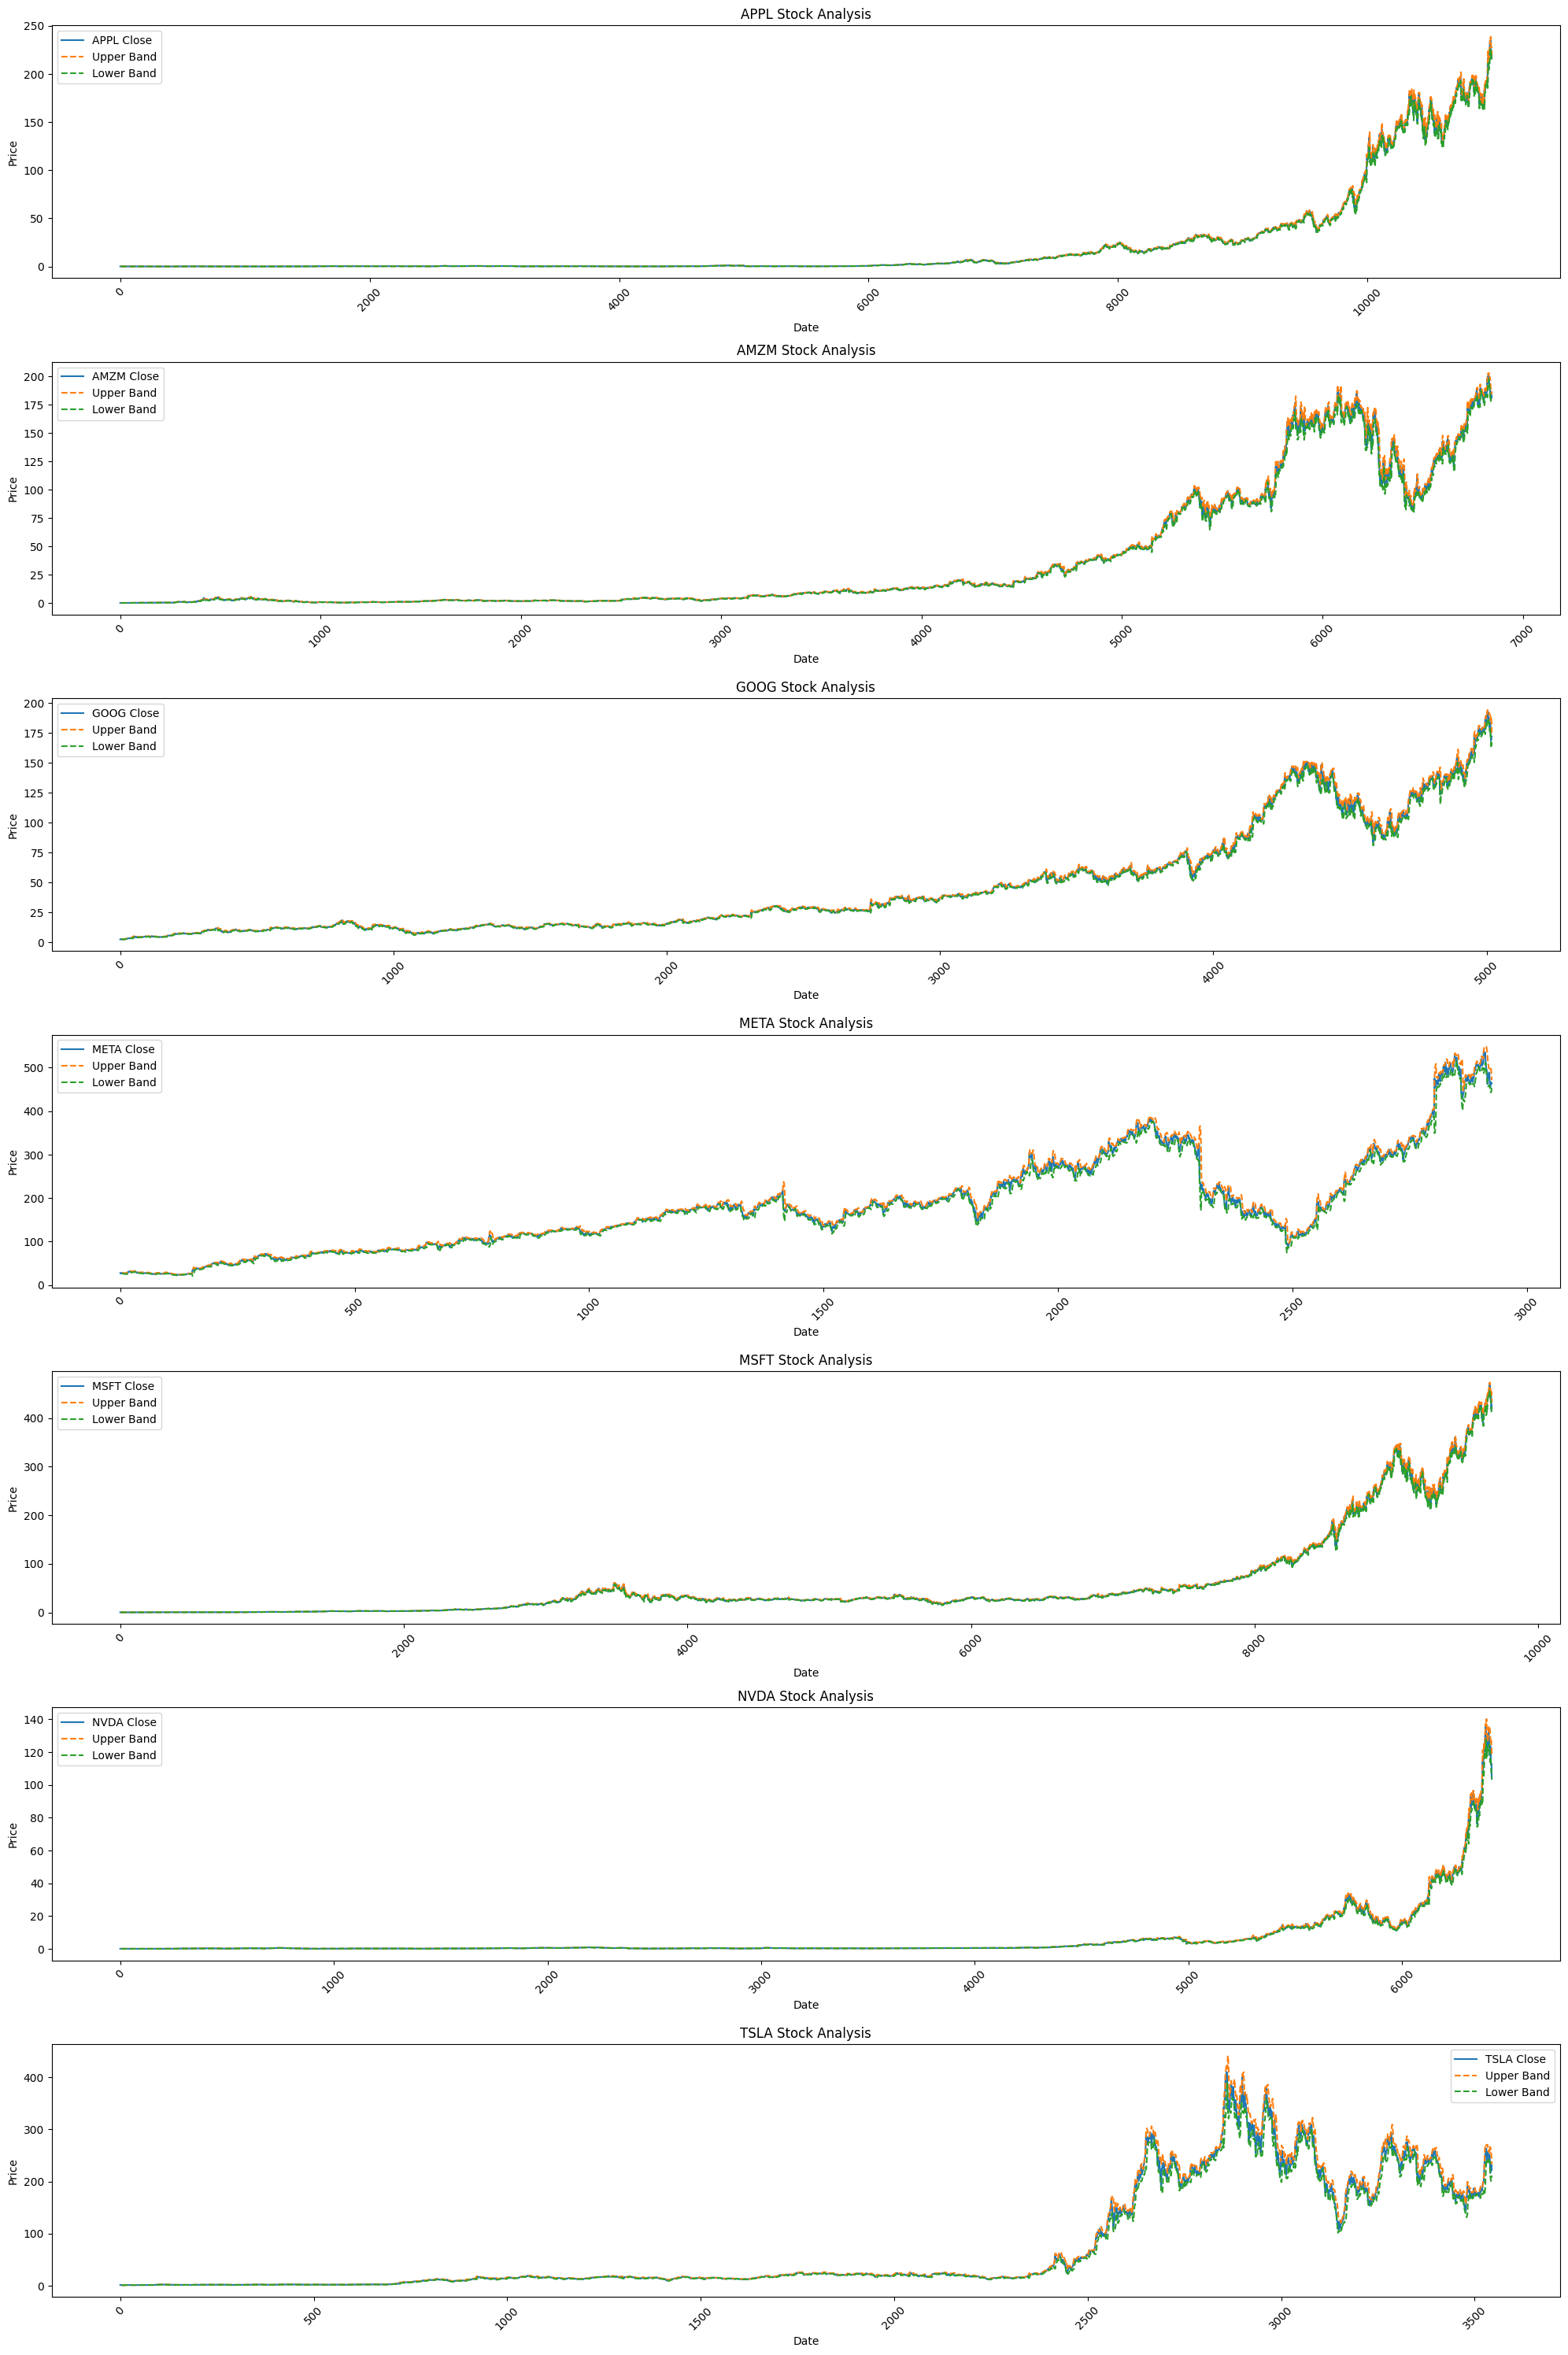

In [72]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    upper_band = upper_bands[idx]
    lower_band = lower_bands[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the Bollinger Bands
    sns.lineplot(x=upper_band.index, y=upper_band, ax=ax[idx], label='Upper Band', linestyle='--')
    sns.lineplot(x=lower_band.index, y=lower_band, ax=ax[idx], label='Lower Band', linestyle='--')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

The bollinger bands help measure the volatility of the stocks, and as we can see they give a really good idea of what the stock values will follow. From the graphs its easy to conclude that the stocks chosen for this analysis are not volatile since they don't extend out of the bands set for them.

Now let us visualie the RSI of the different stocks

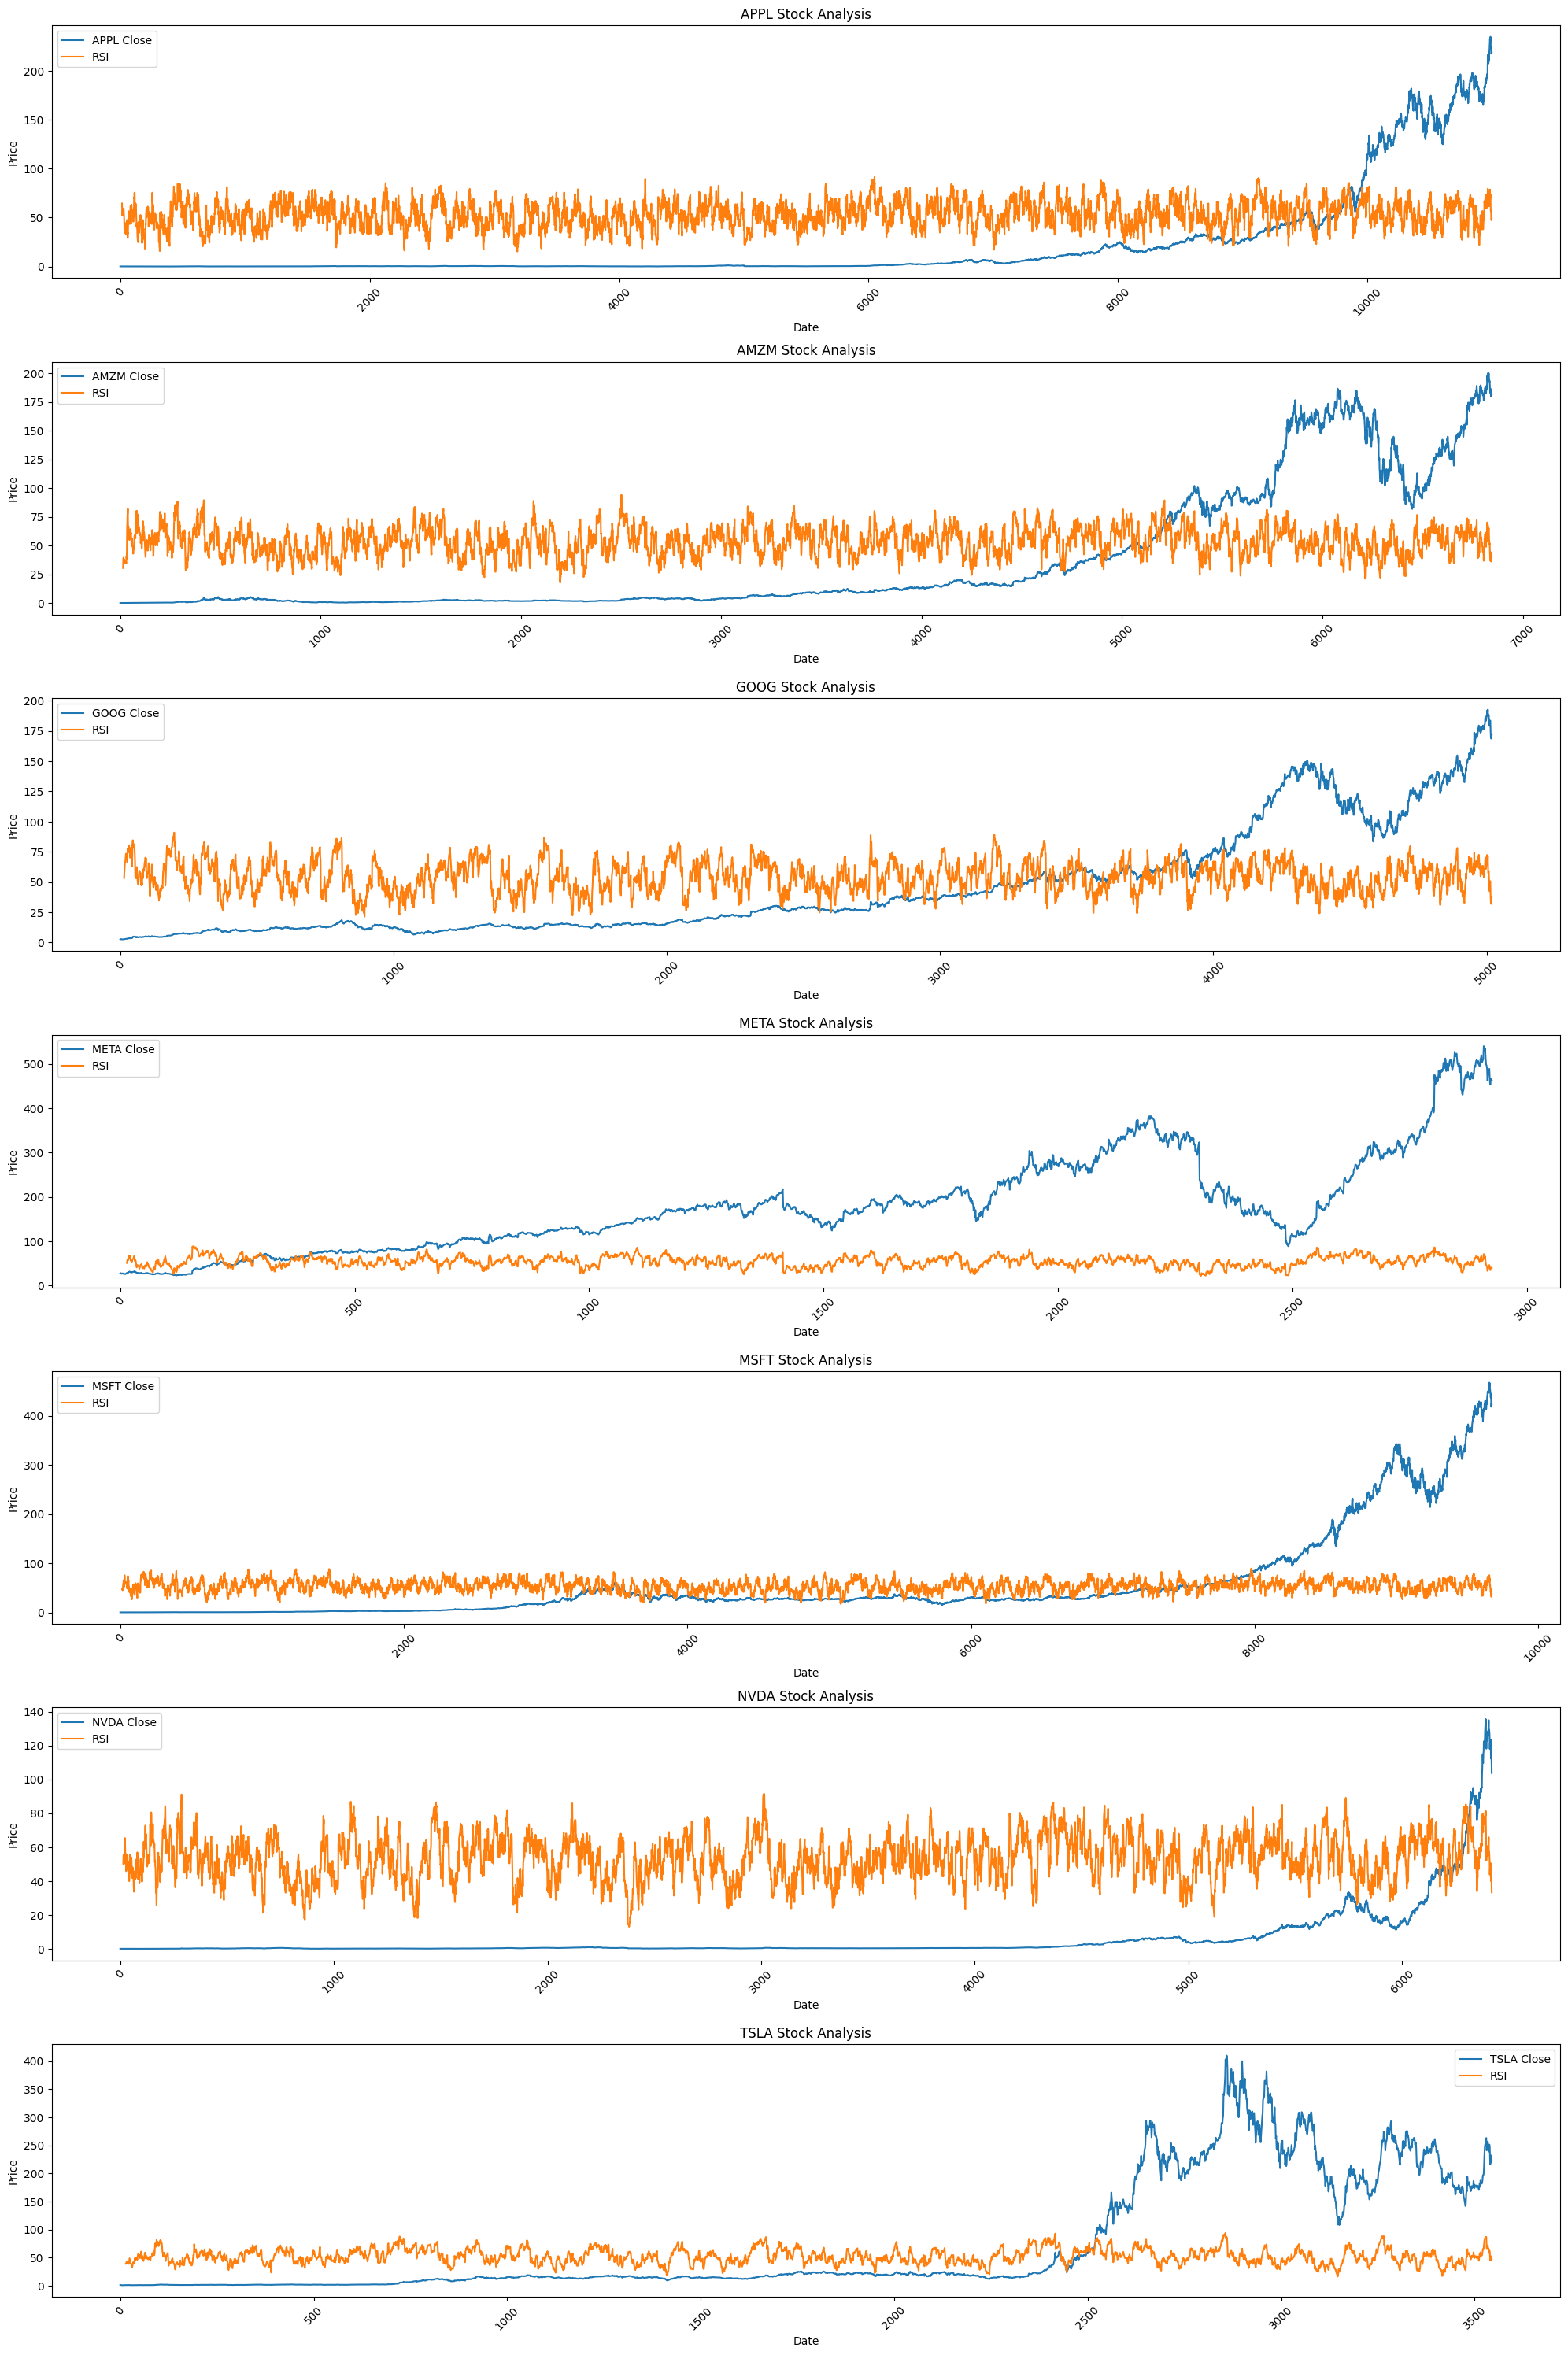

In [73]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    rsi = rsi_values[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the moving average
    sns.lineplot(x=rsi.index, y=rsi, ax=ax[idx], label='RSI')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

From the RSI plots we can see that:
* The TSLA stock's RSI is mostly above 50, it does flucuate but mostly it is around and above 50, and this tells me that the stock is overbought to a degree. And even sometimes it is close to a 100 which shows that most people bought it.
* The NVDA stock's RSI hovers around and above 60 and this also indicates that it is mostly being overbought. And we can see sudden dips to 40 and below that come after peaks of 90 this means that we should consider to sell when the value of the RSI is very high.

The other stocks also exhibit this